Recommendation System Using Customer Data

In [84]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Loading the datasets into pandas dataframe

In [85]:
whole_sale_company = pd.read_csv('wholesale_companies.csv')
whole_sale_customer = pd.read_csv('wholesale_customers.csv')
whole_sale_transactions = pd.read_csv('wholesale_transactions.csv')

Exploring the dataset

In [86]:
whole_sale_company.head()


,company_id,name,location,industry_type,inventory_value
0,314,"Reed, Hood and King",Larryfurt,Electronics,3163898.22
1,593,Wiggins-Allen,Sarahland,Food Wholesale,6250955.35
2,571,Hardy-Williams,Wernermouth,Electronics,2992219.73
3,220,Miller Inc,South Nicole,Food Wholesale,1496112.21
4,551,"Jones, Simmons and Fischer",Williamsburgh,Food Wholesale,9350746.30


In [87]:
whole_sale_customer.head()

,customer_id,company_id,name,business_type,credit_limit,location
0,6014,220,Ryan Ramirez,Distribution,48467.87,Virginiaville
1,6563,593,Lisa Mccormick,Distribution,43684.03,Palmermouth
2,6392,593,Denise Smith,Retail,38196.82,Lake Robert
3,3786,314,Noah Keller,Distribution,25373.43,North Paulview
4,2968,593,Krystal Hall,Distribution,35312.79,Lake Marie


In [88]:
whole_sale_transactions.head()

,transaction_id,company_id,customer_id,transaction_date,item_code,item_name,quantity,unit_price,total_amount
0,418824,314,6563,21/04/2024,BC-9250,Let,94,181.55,17065.70
1,425438,551,5859,06/12/2023,bN-3536,Ground,89,101.01,8989.89
2,263568,551,4644,21/01/2024,Mc-7112,Drop,10,13.73,137.30
3,780508,551,4931,19/01/2024,ls-0866,Industry,92,102.49,9429.08
4,561807,220,8285,10/03/2024,kg-8027,Recent,61,167.93,10243.73


In [89]:
print(whole_sale_company.columns)
print(whole_sale_customer.columns)
print(whole_sale_transactions.columns)


Index(['company_id', 'name', 'location', 'industry_type', 'inventory_value'], dtype='object')
Index(['customer_id', 'company_id', 'name', 'business_type', 'credit_limit',
       'location'],
      dtype='object')
Index(['transaction_id', 'company_id', 'customer_id', 'transaction_date',
       'item_code', 'item_name', 'quantity', 'unit_price', 'total_amount'],
      dtype='object')


In [90]:
print(whole_sale_transactions.shape,
whole_sale_customer.shape,
whole_sale_company.shape , sep =' ')

(400, 9) (100, 6) (5, 5)


In [91]:
print(
whole_sale_transactions.isnull().sum(),
whole_sale_customer.isnull().sum(),
whole_sale_company.isnull().sum() , sep =' ')

transaction_id      0
company_id          0
customer_id         0
transaction_date    0
item_code           0
item_name           0
quantity            0
unit_price          0
total_amount        0
dtype: int64 customer_id      0
company_id       0
name             0
business_type    0
credit_limit     0
location         0
dtype: int64 company_id         0
name               0
location           0
industry_type      0
inventory_value    0
dtype: int64


In [92]:
print(
whole_sale_transactions.isna().sum(),
whole_sale_customer.isna().sum(),
whole_sale_company.isna().sum() , sep =' ')

transaction_id      0
company_id          0
customer_id         0
transaction_date    0
item_code           0
item_name           0
quantity            0
unit_price          0
total_amount        0
dtype: int64 customer_id      0
company_id       0
name             0
business_type    0
credit_limit     0
location         0
dtype: int64 company_id         0
name               0
location           0
industry_type      0
inventory_value    0
dtype: int64


Changing item names in whole_sale_transactions dataset 

In [93]:
# Example list of items
item_names = [
    "Organic Apples",
    "Whole Grain Bread",
    "Almond Milk",
    "Free-Range Eggs",
    "Grass-Fed Beef",
    "Quinoa",
    "Fresh Spinach",
    "Avocado Oil",
    "Dark Chocolate",
    "Greek Yogurt",
    "Oatmeal",
    "Raw Honey",
    "Fresh Salmon",
    "Coconut Water",
    "Kale Chips",
    "Protein Powder",
    "Mixed Nuts",
    "Basmati Rice",
    "Spaghetti Pasta",
    "Extra Virgin Olive Oil"
]

# Randomize item names in transactions
whole_sale_transactions['item_name'] = [random.choice(item_names) for _ in range(len(whole_sale_transactions))]


Merging the three dataset into one dataset

In [94]:
merged_data = whole_sale_transactions.merge(whole_sale_company, on='company_id').merge(whole_sale_customer, on='customer_id')
merged_data.head(3)

,transaction_id,company_id_x,customer_id,transaction_date,item_code,item_name,quantity,unit_price,total_amount,name_x,location_x,industry_type,inventory_value,company_id_y,name_y,business_type,credit_limit,location_y
0,418824,314,6563,21/04/2024,BC-9250,Extra Virgin Olive Oil,94,181.55,17065.70,"Reed, Hood and King",Larryfurt,Electronics,3163898.22,593,Lisa Mccormick,Distribution,43684.03,Palmermouth
1,425438,551,5859,06/12/2023,bN-3536,Almond Milk,89,101.01,8989.89,"Jones, Simmons and Fischer",Williamsburgh,Food Wholesale,9350746.30,571,Thomas Allen,Distribution,6146.12,Knappland
2,263568,551,4644,21/01/2024,Mc-7112,Extra Virgin Olive Oil,10,13.73,137.30,"Jones, Simmons and Fischer",Williamsburgh,Food Wholesale,9350746.30,314,Julian Savage,Distribution,22671.37,Millerton


In [95]:
merged_data.columns

Index(['transaction_id', 'company_id_x', 'customer_id', 'transaction_date',
       'item_code', 'item_name', 'quantity', 'unit_price', 'total_amount',
       'name_x', 'location_x', 'industry_type', 'inventory_value',
       'company_id_y', 'name_y', 'business_type', 'credit_limit',
       'location_y'],
      dtype='object')

In [96]:
len(merged_data.columns)

18

Renaming some duplacated columns names after merging

In [97]:
merged_data = merged_data.rename(columns={
    'company_id_x': 'company_id',
    'name_x': 'company_name',
    'location_x': 'company_location',
    'name_y': 'customer_name',
    'location_y': 'customer_location'
})

Creating customer profile

In [98]:
customer_profiles = merged_data[['customer_id', 'item_name', 'quantity', 'total_amount','inventory_value', 'business_type', 'credit_limit', 'customer_location']]
customer_profiles.head()

,customer_id,item_name,quantity,total_amount,inventory_value,business_type,credit_limit,customer_location
0,6563,Extra Virgin Olive Oil,94,17065.70,3163898.22,Distribution,43684.03,Palmermouth
1,5859,Almond Milk,89,8989.89,9350746.30,Distribution,6146.12,Knappland
2,4644,Extra Virgin Olive Oil,10,137.30,9350746.30,Distribution,22671.37,Millerton
3,4931,Protein Powder,92,9429.08,9350746.30,Distribution,45480.11,Cassandraview
4,8285,Spaghetti Pasta,61,10243.73,1496112.21,Distribution,22488.48,Davidberg


In [99]:
customer_item_matrix = customer_profiles.pivot_table(index='customer_id', columns='item_name', values='quantity', fill_value=0)
customer_item_matrix.head()

item_name,Almond Milk,Avocado Oil,Basmati Rice,Coconut Water,Dark Chocolate,Extra Virgin Olive Oil,Free-Range Eggs,Fresh Salmon,Fresh Spinach,Grass-Fed Beef,Greek Yogurt,Kale Chips,Mixed Nuts,Oatmeal,Organic Apples,Protein Powder,Quinoa,Raw Honey,Spaghetti Pasta,Whole Grain Bread
customer_id,,,,,,,,,,,,,,,,,,,,
2121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2223,0.0,0.0,0.0,25.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,88.0
2330,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,33.0,39.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,0.0,0.0,0.0
2361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0
2386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Visualizing top 10 customers by their purchases

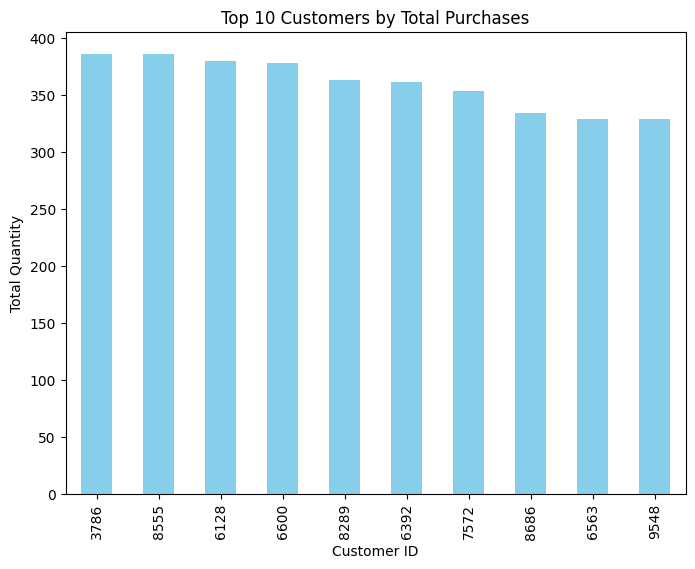

In [100]:

top_customers = customer_item_matrix.sum(axis=1).sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
top_customers.plot(kind="bar", color="skyblue")
plt.title("Top 10 Customers by Total Purchases")
plt.xlabel("Customer ID")
plt.ylabel("Total Quantity")
plt.show()


Merging the items purchase by each customer into one dimentional array seperated by comma and also Vectorizing them into their numerical representation

In [101]:
customer_profiles['item_string'] = customer_profiles.groupby('customer_id')['item_name'].transform(lambda x: ' '.join(x))
customer_profiles = customer_profiles[['customer_id', 'item_string']].drop_duplicates()

vectorizer = TfidfVectorizer()
item_vectors = vectorizer.fit_transform(customer_profiles['item_string'])
print(item_vectors)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 784 stored elements and shape (98, 41)>
  Coords	Values
  (0, 11)	0.30705861764421366
  (0, 37)	0.30705861764421366
  (0, 25)	0.30705861764421366
  (0, 24)	0.459705512440832
  (0, 2)	0.29007586403541935
  (0, 14)	0.22082158109281258
  (0, 34)	0.2799963431732958
  (0, 30)	0.31332184095598525
  (0, 8)	0.31332184095598525
  (0, 38)	0.31332184095598525
  (1, 24)	0.4188070319415412
  (1, 2)	0.5285375457410391
  (1, 14)	0.20117581465378304
  (1, 8)	0.2854466320329911
  (1, 38)	0.2854466320329911
  (1, 0)	0.26426877287051953
  (1, 20)	0.26426877287051953
  (1, 29)	0.25957753898068475
  (1, 28)	0.25957753898068475
  (1, 36)	0.25957753898068475
  (2, 11)	0.2491692759223903
  (2, 37)	0.2491692759223903
  (2, 25)	0.2491692759223903
  (2, 24)	0.18651893008444284
  (2, 14)	0.1791903900664563
  :	:
  (91, 19)	0.30560352499964505
  (91, 6)	0.30560352499964505
  (92, 14)	0.31180980449838086
  (92, 34)	0.3953671764918298
  (92, 23)	0.4517738

C:\Users\felix\AppData\Local\Temp\ipykernel_31216\3993520949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_profiles['item_string'] = customer_profiles.groupby('customer_id')['item_name'].transform(lambda x: ' '.join(x))


Applying cosine similarity

In [102]:
similarity_matrix = cosine_similarity(item_vectors, item_vectors)
print(similarity_matrix)



[[1.         0.56914118 0.49812191 ... 0.12102423 0.1352704  0.        ]
 [0.56914118 1.         0.11416421 ... 0.         0.3284086  0.        ]
 [0.49812191 0.11416421 1.         ... 0.20061002 0.10976805 0.        ]
 ...
 [0.12102423 0.         0.20061002 ... 1.         0.         0.        ]
 [0.1352704  0.3284086  0.10976805 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


Similarity matrix heatmap

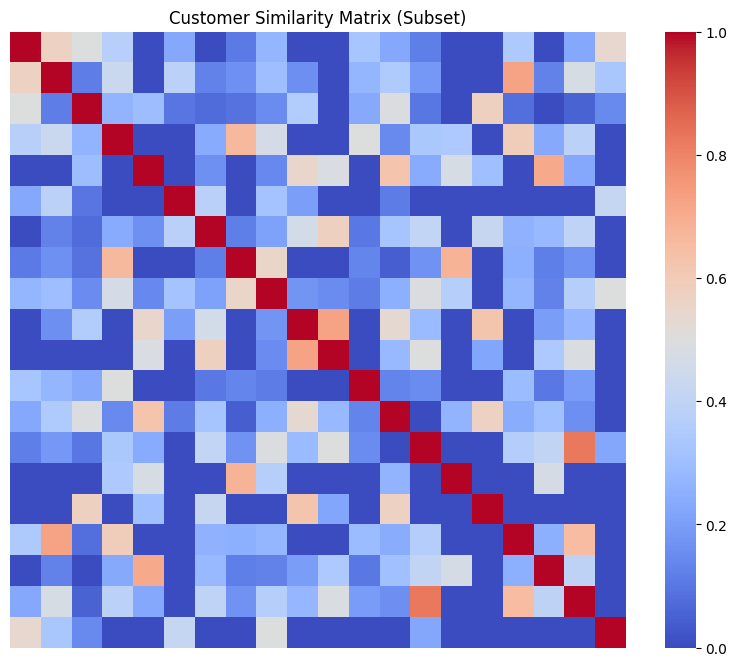

In [103]:
# Similarity matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix[:20, :20], cmap="coolwarm", square=True, xticklabels=False, yticklabels=False)
plt.title("Customer Similarity Matrix (Subset)")
plt.show()


Converting similarity matrix into a pandas dataframe

In [104]:
similarity_df = pd.DataFrame(similarity_matrix, index=customer_profiles['customer_id'], columns=customer_profiles['customer_id'])

In [105]:
similarity_df.head(3)

customer_id,6563,5859,4644,4931,8285,3873,7367,4130,7876,7143,...,9602,3347,2386,9599,6801,3580,2623,3934,5085,2361
customer_id,,,,,,,,,,,,,,,,,,,,,
6563,1.000000,0.569141,0.498122,0.371284,0.000000,0.226738,0.000000,0.108341,0.270297,0.000000,...,0.0,0.482016,0.356595,0.358822,0.179556,0.387979,0.0,0.121024,0.135270,0.0
5859,0.569141,1.000000,0.114164,0.433443,0.000000,0.383618,0.126952,0.163879,0.299925,0.158663,...,0.0,0.680241,0.124578,0.326898,0.062729,0.510155,0.0,0.000000,0.328409,0.0
4644,0.498122,0.114164,1.000000,0.264885,0.296129,0.095925,0.071290,0.087915,0.149348,0.359110,...,0.0,0.222112,0.289367,0.000000,0.262996,0.257422,0.0,0.200610,0.109768,0.0


Recommendation function. Recommendation is done base on the number of inventory available in stock.

In [106]:
def get_recommendations(customer_id, top_n=5, min_inventory=0):
    if customer_id not in similarity_df.index:
        raise ValueError(f"Customer ID {customer_id} not found in similarity matrix.")
    
    similar_customers = similarity_df[customer_id].sort_values(ascending=False).index[1:top_n+1]
    recommended_items = customer_item_matrix.loc[similar_customers].mean(axis=0).sort_values(ascending=False)
    
    available_items = merged_data[merged_data['inventory_value'] >= min_inventory]['item_name'].unique()
    filtered_recommendations = [item for item in recommended_items.index if item in available_items]
    
    top_recommendations = filtered_recommendations[:top_n]
    scores = recommended_items[top_recommendations]
    

    plt.figure(figsize=(8, 6))
    sns.barplot(x=scores.values, y=scores.index, palette="magma",hue=scores)
    plt.title(f"Top {top_n} Recommendations for Customer {customer_id}")
    plt.xlabel("Recommendation Score")
    plt.ylabel("Item")
    plt.show()
    
    return top_recommendations


Testing with Customer ID 4644 

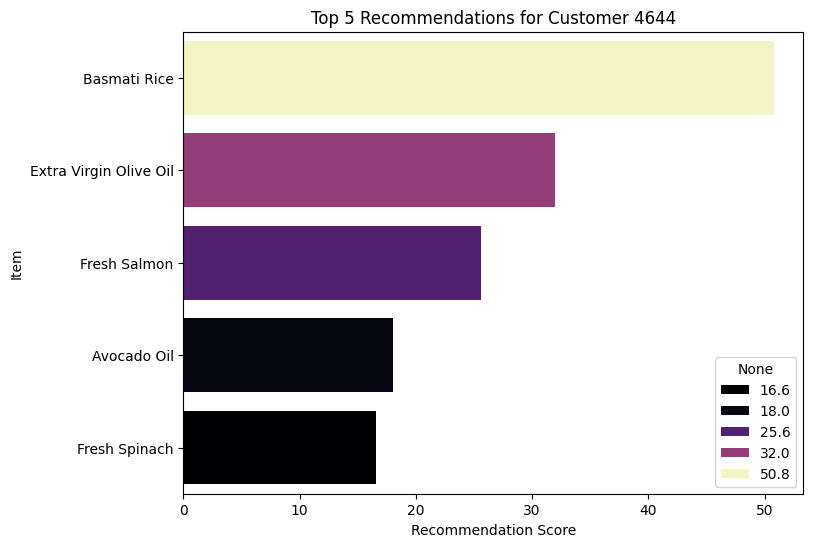

['Basmati Rice', 'Extra Virgin Olive Oil', 'Fresh Salmon', 'Avocado Oil', 'Fresh Spinach']


In [107]:

recommendations = get_recommendations(customer_id=4644)
print(recommendations)